In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, Activation, UpSampling2D, Dropout, BatchNormalization, Conv2DTranspose
from tensorflow.keras import activations
import graphviz

2024-01-04 14:34:19.264719: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 14:34:20.955690: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 14:34:20.960155: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-04 14:34:23.530840: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
class Generator:
    
    def __init__(self, shape_of_image) :
        self.input_layer =Input(shape=shape_of_image)
        self.previous_layer=self.input_layer
        
        # downsampling
        self.downsample(64, 4)
        self.downsample(128, 4) 
        self.downsample(256, 4) 
        self.downsample(512, 4) 
        self.downsample(512, 4) 
        self.downsample(512, 4) 
        self.downsample(512, 4) 
        self.downsample(512, 4) 
        
        # upsampling
        self.upsample(512, 4, dropout_rate=0.5) 
        self.upsample(512, 4, dropout_rate=0.5) 
        self.upsample(512, 4, dropout_rate=0.5) 
        self.upsample(512, 4)
        self.upsample(256, 4)
        self.upsample(128, 4)
        self.upsample(64,  4)
        
        self.output_layer = Conv2DTranspose(3, 4, strides=2, padding='same', activation='tanh')(self.previous_layer)
        self.model = keras.Model(inputs=self.input_layer, outputs=self.output_layer, name="Generator(U-Net)")
        
    
    def downsample(self, filters, kernel_size):
        initializer = tf.random_normal_initializer(0., 0.02)
        conv = Conv2D(filters=filters, kernel_size=kernel_size, strides=2, padding='same', kernel_initializer=initializer)(self.previous_layer)
        norm = BatchNormalization()(conv)
        relu = Activation(activations.relu)(norm)
        self.previous_layer = relu
        
    def upsample(self, filters, kernel_size, dropout_rate=0.0):
        initializer = tf.random_normal_initializer(0., 0.02)
        conv_transpose = Conv2DTranspose(filters=filters, kernel_size=kernel_size, strides=2, padding='same', kernel_initializer=initializer)(self.previous_layer)
        norm = BatchNormalization()(conv_transpose)
        if (dropout_rate > 0) :
            dropout = Dropout(dropout_rate)(norm)
            relu = Activation(activations.relu)(dropout)
            self.previous_layer = relu
        else :
            relu = Activation(activations.relu)(norm)
            self.previous_layer = relu
        

In [10]:
generator = Generator((150, 150, 3)).model

In [11]:
generator.summary()

Model: "Generator(U-Net)"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        3136      
                                                                 
 batch_normalization_15 (Ba  (None, 75, 75, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_15 (Activation)  (None, 75, 75, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 38, 38, 128)       131200    
                                                                 
 batch_normalization_16 (Ba  (None, 38, 38, 128)       512       
 tchNormalization)                                

 DTranspose)                                                     
                                                                 
Total params: 39093123 (149.13 MB)
Trainable params: 39082115 (149.09 MB)
Non-trainable params: 11008 (43.00 KB)
_________________________________________________________________


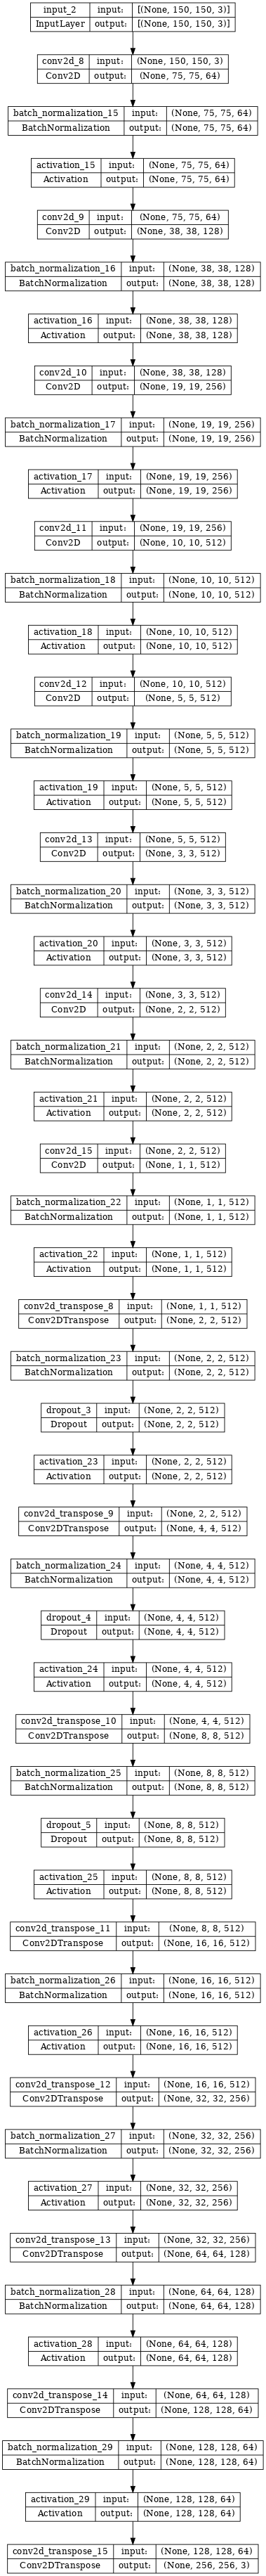

In [12]:
keras.utils.plot_model(generator, show_shapes=True, dpi=64)

In [ ]:
# TODO [vukan] : Check with Kaca, do we resize the images to 256, 256?